In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet,SGDClassifier,SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error,confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostRegressor,AdaBoostClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from pandas.api.types import is_string_dtype,is_numeric_dtype
import joblib as joblib


In [2]:
df=pd.read_csv('World_Covid_Case.csv')
df_population=pd.read_csv('population_structure_by_age_per_contry.csv')
print(df_population)
print(df)

                   Country  Fraction age 0-14 years  Fraction age 15-64 years  \
0                      USA                    0.189                     0.657   
1                   Russia                    0.176                     0.682   
2                    Spain                    0.147                     0.659   
3                   Brazil                    0.217                     0.697   
4                       UK                    0.177                     0.638   
..                     ...                      ...                       ...   
208              St. Barth                      NaN                       NaN   
209         Western Sahara                      NaN                       NaN   
210               Anguilla                      NaN                       NaN   
211                Lesotho                    0.354                     0.601   
212  Saint Pierre Miquelon                      NaN                       NaN   

     Fraction age 65+ years

In [3]:
df=df.merge(df_population, on='Country', how='left')
df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,0.176,0.682,0.142
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,0.147,0.659,0.194
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,0.217,0.697,0.086
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0,0.177,0.638,0.185
...,...,...,...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0,NaN,NaN,NaN
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0,NaN,NaN,NaN
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0,NaN,NaN,NaN
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0,0.354,0.601,0.045


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6603 entries, 0 to 6602
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      6603 non-null   object 
 1   Country                   6603 non-null   object 
 2   Population                6603 non-null   int64  
 3   Total Tests               5505 non-null   float64
 4   Total Cases               6554 non-null   float64
 5   Total Deaths              5367 non-null   float64
 6   Total Recovered           6318 non-null   float64
 7   Serious or Critical       4117 non-null   float64
 8   Active Cases              6544 non-null   float64
 9   Fraction age 0-14 years   5456 non-null   float64
 10  Fraction age 15-64 years  5456 non-null   float64
 11  Fraction age 65+ years    5456 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 670.6+ KB


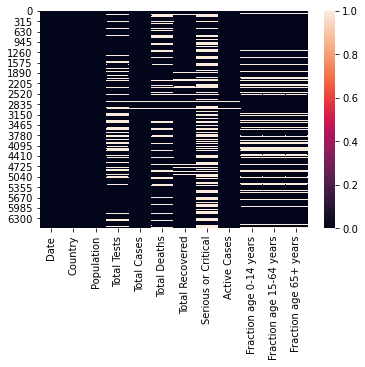

In [5]:
sns.heatmap(data=df.isna())

In [6]:
#missing values are present
#drop records with missing values
df=df.dropna()
df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,0.176,0.682,0.142
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,0.147,0.659,0.194
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,0.217,0.697,0.086
5,2020-04-18,Italy,60471924,1305833.0,175925.0,23227.0,44927.0,2733.0,107771.0,0.135,0.635,0.230
...,...,...,...,...,...,...,...,...,...,...,...,...
6549,2020-05-18,Guyana,786108,1164.0,124.0,10.0,44.0,3.0,70.0,0.281,0.657,0.053
6554,2020-05-18,Bahamas,392795,1826.0,96.0,11.0,43.0,1.0,42.0,0.205,0.706,0.090
6556,2020-05-18,Barbados,287335,4004.0,88.0,7.0,68.0,4.0,13.0,0.191,0.660,0.150
6560,2020-05-18,Malawi,19066433,1803.0,70.0,3.0,27.0,1.0,40.0,0.440,0.530,0.030


In [7]:
df["Date"]= pd.to_datetime(df["Date"]) 

<ipython-input-7-59511878f68a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"]= pd.to_datetime(df["Date"])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3242 entries, 0 to 6571
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      3242 non-null   datetime64[ns]
 1   Country                   3242 non-null   object        
 2   Population                3242 non-null   int64         
 3   Total Tests               3242 non-null   float64       
 4   Total Cases               3242 non-null   float64       
 5   Total Deaths              3242 non-null   float64       
 6   Total Recovered           3242 non-null   float64       
 7   Serious or Critical       3242 non-null   float64       
 8   Active Cases              3242 non-null   float64       
 9   Fraction age 0-14 years   3242 non-null   float64       
 10  Fraction age 15-64 years  3242 non-null   float64       
 11  Fraction age 65+ years    3242 non-null   float64       
dtypes: datetime64[ns](1)

In [9]:
df['Month']=pd.DatetimeIndex(df['Date']).month
df

<ipython-input-9-69f8b9fd41a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=pd.DatetimeIndex(df['Date']).month


,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Month
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154,4
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,0.176,0.682,0.142,4
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,0.147,0.659,0.194,4
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,0.217,0.697,0.086,4
5,2020-04-18,Italy,60471924,1305833.0,175925.0,23227.0,44927.0,2733.0,107771.0,0.135,0.635,0.230,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6549,2020-05-18,Guyana,786108,1164.0,124.0,10.0,44.0,3.0,70.0,0.281,0.657,0.053,5
6554,2020-05-18,Bahamas,392795,1826.0,96.0,11.0,43.0,1.0,42.0,0.205,0.706,0.090,5
6556,2020-05-18,Barbados,287335,4004.0,88.0,7.0,68.0,4.0,13.0,0.191,0.660,0.150,5
6560,2020-05-18,Malawi,19066433,1803.0,70.0,3.0,27.0,1.0,40.0,0.440,0.530,0.030,5


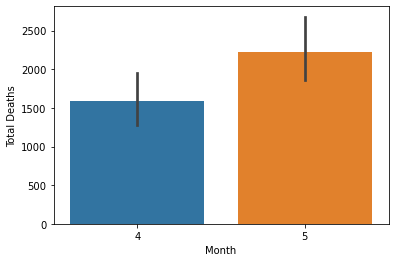

In [10]:
sns.barplot(data=df,x='Month',y='Total Deaths')
#Death rate is more in May month

In [11]:
#country wise population
df_total=df.groupby(['Country']).sum()
df_total=df_total.sort_values(by='Population',ascending=False)
df_total_10=df_total.head(10)
df_total_10=df_total_10.reset_index()
df_total_10
#USA country has heighest populaion followed by Pakistan

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Month
0,USA,10254014584,232000501.0,36196503.0,2102393.0,6004896.0,488102.0,28115408.0,5.859,20.367,4.774,142
1,Pakistan,6831060428,6749572.0,680637.0,14905.0,176406.0,3077.0,490368.0,10.788,18.817,1.395,142
2,Brazil,6583808892,12361642.0,3660023.0,248971.0,1533045.0,254091.0,1882320.0,6.727,21.607,2.666,142
3,Nigeria,6370070991,576619.0,89316.0,2834.0,18447.0,117.0,68203.0,13.640,16.523,0.868,142
4,Bangladesh,5099284271,2750082.0,330630.0,5937.0,46800.0,31.0,278556.0,8.804,20.615,1.581,142
5,Russia,4523746052,130214963.0,4579604.0,42407.0,745508.0,61916.0,3802264.0,5.456,21.142,4.402,142
6,Mexico,3991877843,3004813.0,747087.0,73754.0,457911.0,11205.0,216682.0,8.277,20.615,2.139,142
7,Japan,3922123565,5594215.0,443618.0,15386.0,148549.0,8496.0,279976.0,3.999,18.631,8.370,142
8,Philippines,3391520590,3971251.0,287458.0,19046.0,44096.0,975.0,224607.0,9.827,19.685,1.488,142
9,Turkey,2611132325,35117203.0,3813621.0,100998.0,1915267.0,43941.0,1798965.0,7.750,20.739,2.542,142


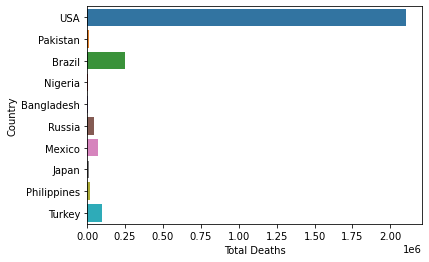

In [12]:

sns.barplot(data=df_total_10,y='Country',x='Total Deaths')
#USA has more death rate

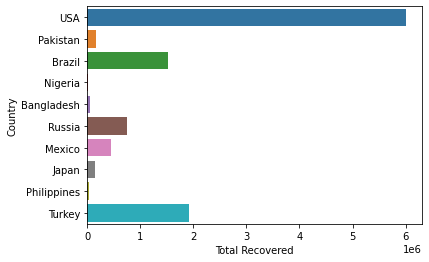

In [13]:

sns.barplot(data=df_total_10,y='Country',x='Total Recovered')
#USA has more recovered rate.
#country with more covid case has also more recovered rate

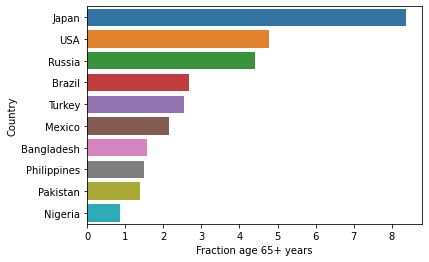

In [14]:
df_age=df_total_10.sort_values(by='Fraction age 65+ years',ascending=False)
df_age=df_age.head(20)
sns.barplot(data=df_age,x='Fraction age 65+ years',y='Country')
#Elder people count is more in Japan followed by USA,Russia,Brazil,Turkey 

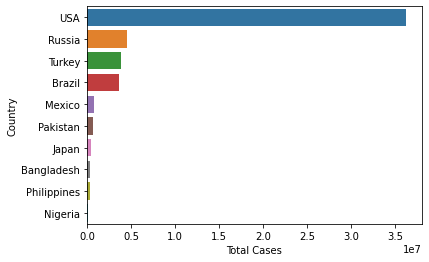

In [15]:
df_age=df_age.sort_values(by='Total Cases',ascending=False)
sns.barplot(data=df_age,x='Total Cases',y='Country')
#From below plot it is clear that country which has more elder people has more covid case

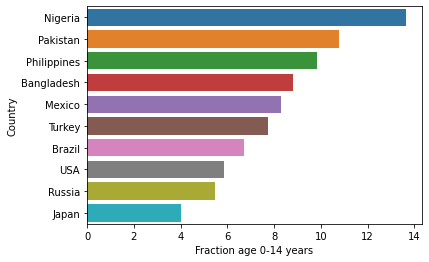

In [16]:
df_age=df_total_10.sort_values(by='Fraction age 0-14 years',ascending=False)
df_age=df_age.head(20)
sns.barplot(data=df_age,x='Fraction age 0-14 years',y='Country')
#Nigeria has heighest youth count followed by pakistan,philippines,bangladesh and mexico

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3242 entries, 0 to 6571
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      3242 non-null   datetime64[ns]
 1   Country                   3242 non-null   object        
 2   Population                3242 non-null   int64         
 3   Total Tests               3242 non-null   float64       
 4   Total Cases               3242 non-null   float64       
 5   Total Deaths              3242 non-null   float64       
 6   Total Recovered           3242 non-null   float64       
 7   Serious or Critical       3242 non-null   float64       
 8   Active Cases              3242 non-null   float64       
 9   Fraction age 0-14 years   3242 non-null   float64       
 10  Fraction age 15-64 years  3242 non-null   float64       
 11  Fraction age 65+ years    3242 non-null   float64       
 12  Month               

In [18]:
df=df.drop(['Date','Month'],axis=1)
df

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154
1,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,0.176,0.682,0.142
2,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,0.147,0.659,0.194
3,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,0.217,0.697,0.086
5,Italy,60471924,1305833.0,175925.0,23227.0,44927.0,2733.0,107771.0,0.135,0.635,0.230
...,...,...,...,...,...,...,...,...,...,...,...
6549,Guyana,786108,1164.0,124.0,10.0,44.0,3.0,70.0,0.281,0.657,0.053
6554,Bahamas,392795,1826.0,96.0,11.0,43.0,1.0,42.0,0.205,0.706,0.090
6556,Barbados,287335,4004.0,88.0,7.0,68.0,4.0,13.0,0.191,0.660,0.150
6560,Malawi,19066433,1803.0,70.0,3.0,27.0,1.0,40.0,0.440,0.530,0.030


In [19]:
#convert string data to int
for col in df.columns:
    if(is_string_dtype(df[col])):
        labelEncoder=LabelEncoder()
        df[col]=labelEncoder.fit_transform(df[col])

In [20]:
df.dtypes

Country                       int32
Population                    int64
Total Tests                 float64
Total Cases                 float64
Total Deaths                float64
Total Recovered             float64
Serious or Critical         float64
Active Cases                float64
Fraction age 0-14 years     float64
Fraction age 15-64 years    float64
Fraction age 65+ years      float64
dtype: object

In [21]:
df.describe()

,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
count,3242.000000,3.242000e+03,3.242000e+03,3.242000e+03,3242.000000,3242.000000,3242.000000,3.242000e+03,3242.000000,3242.000000,3242.000000
mean,57.661320,3.281590e+07,3.322855e+05,3.041770e+04,1965.386181,10376.896669,467.561073,1.809725e+04,0.225642,0.661531,0.112801
std,34.084881,5.404282e+07,9.538617e+05,1.227912e+05,8057.354352,31167.508787,1853.445360,9.112594e+04,0.081854,0.052134,0.063426
min,0.000000,9.783300e+04,7.300000e+01,1.700000e+01,0.000000,2.000000,1.000000,2.000000e+00,0.115000,0.527000,0.011000
25%,28.000000,4.262847e+06,2.223725e+04,9.112500e+02,14.000000,272.250000,4.000000,4.262500e+02,0.157000,0.642000,0.053000
50%,58.000000,1.019102e+07,8.469100e+04,3.570500e+03,89.000000,1102.500000,22.000000,1.702500e+03,0.203000,0.659000,0.109000
75%,88.000000,3.770277e+07,2.325065e+05,1.421075e+04,405.000000,4324.000000,123.000000,7.757500e+03,0.276000,0.689000,0.168000
max,115.000000,3.307747e+08,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06,0.448000,0.850000,0.270000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022163C83850>,
      dtype=object)

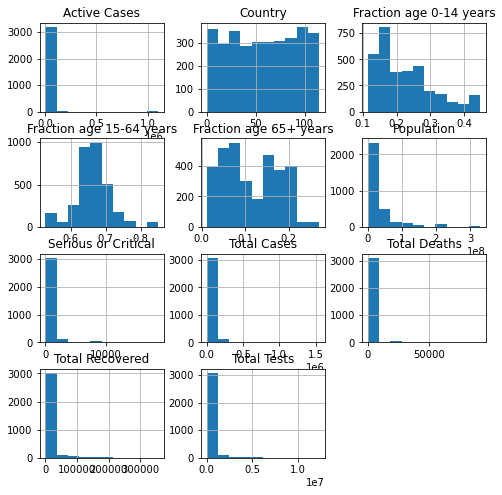

In [22]:
df.hist(figsize=(8,8))

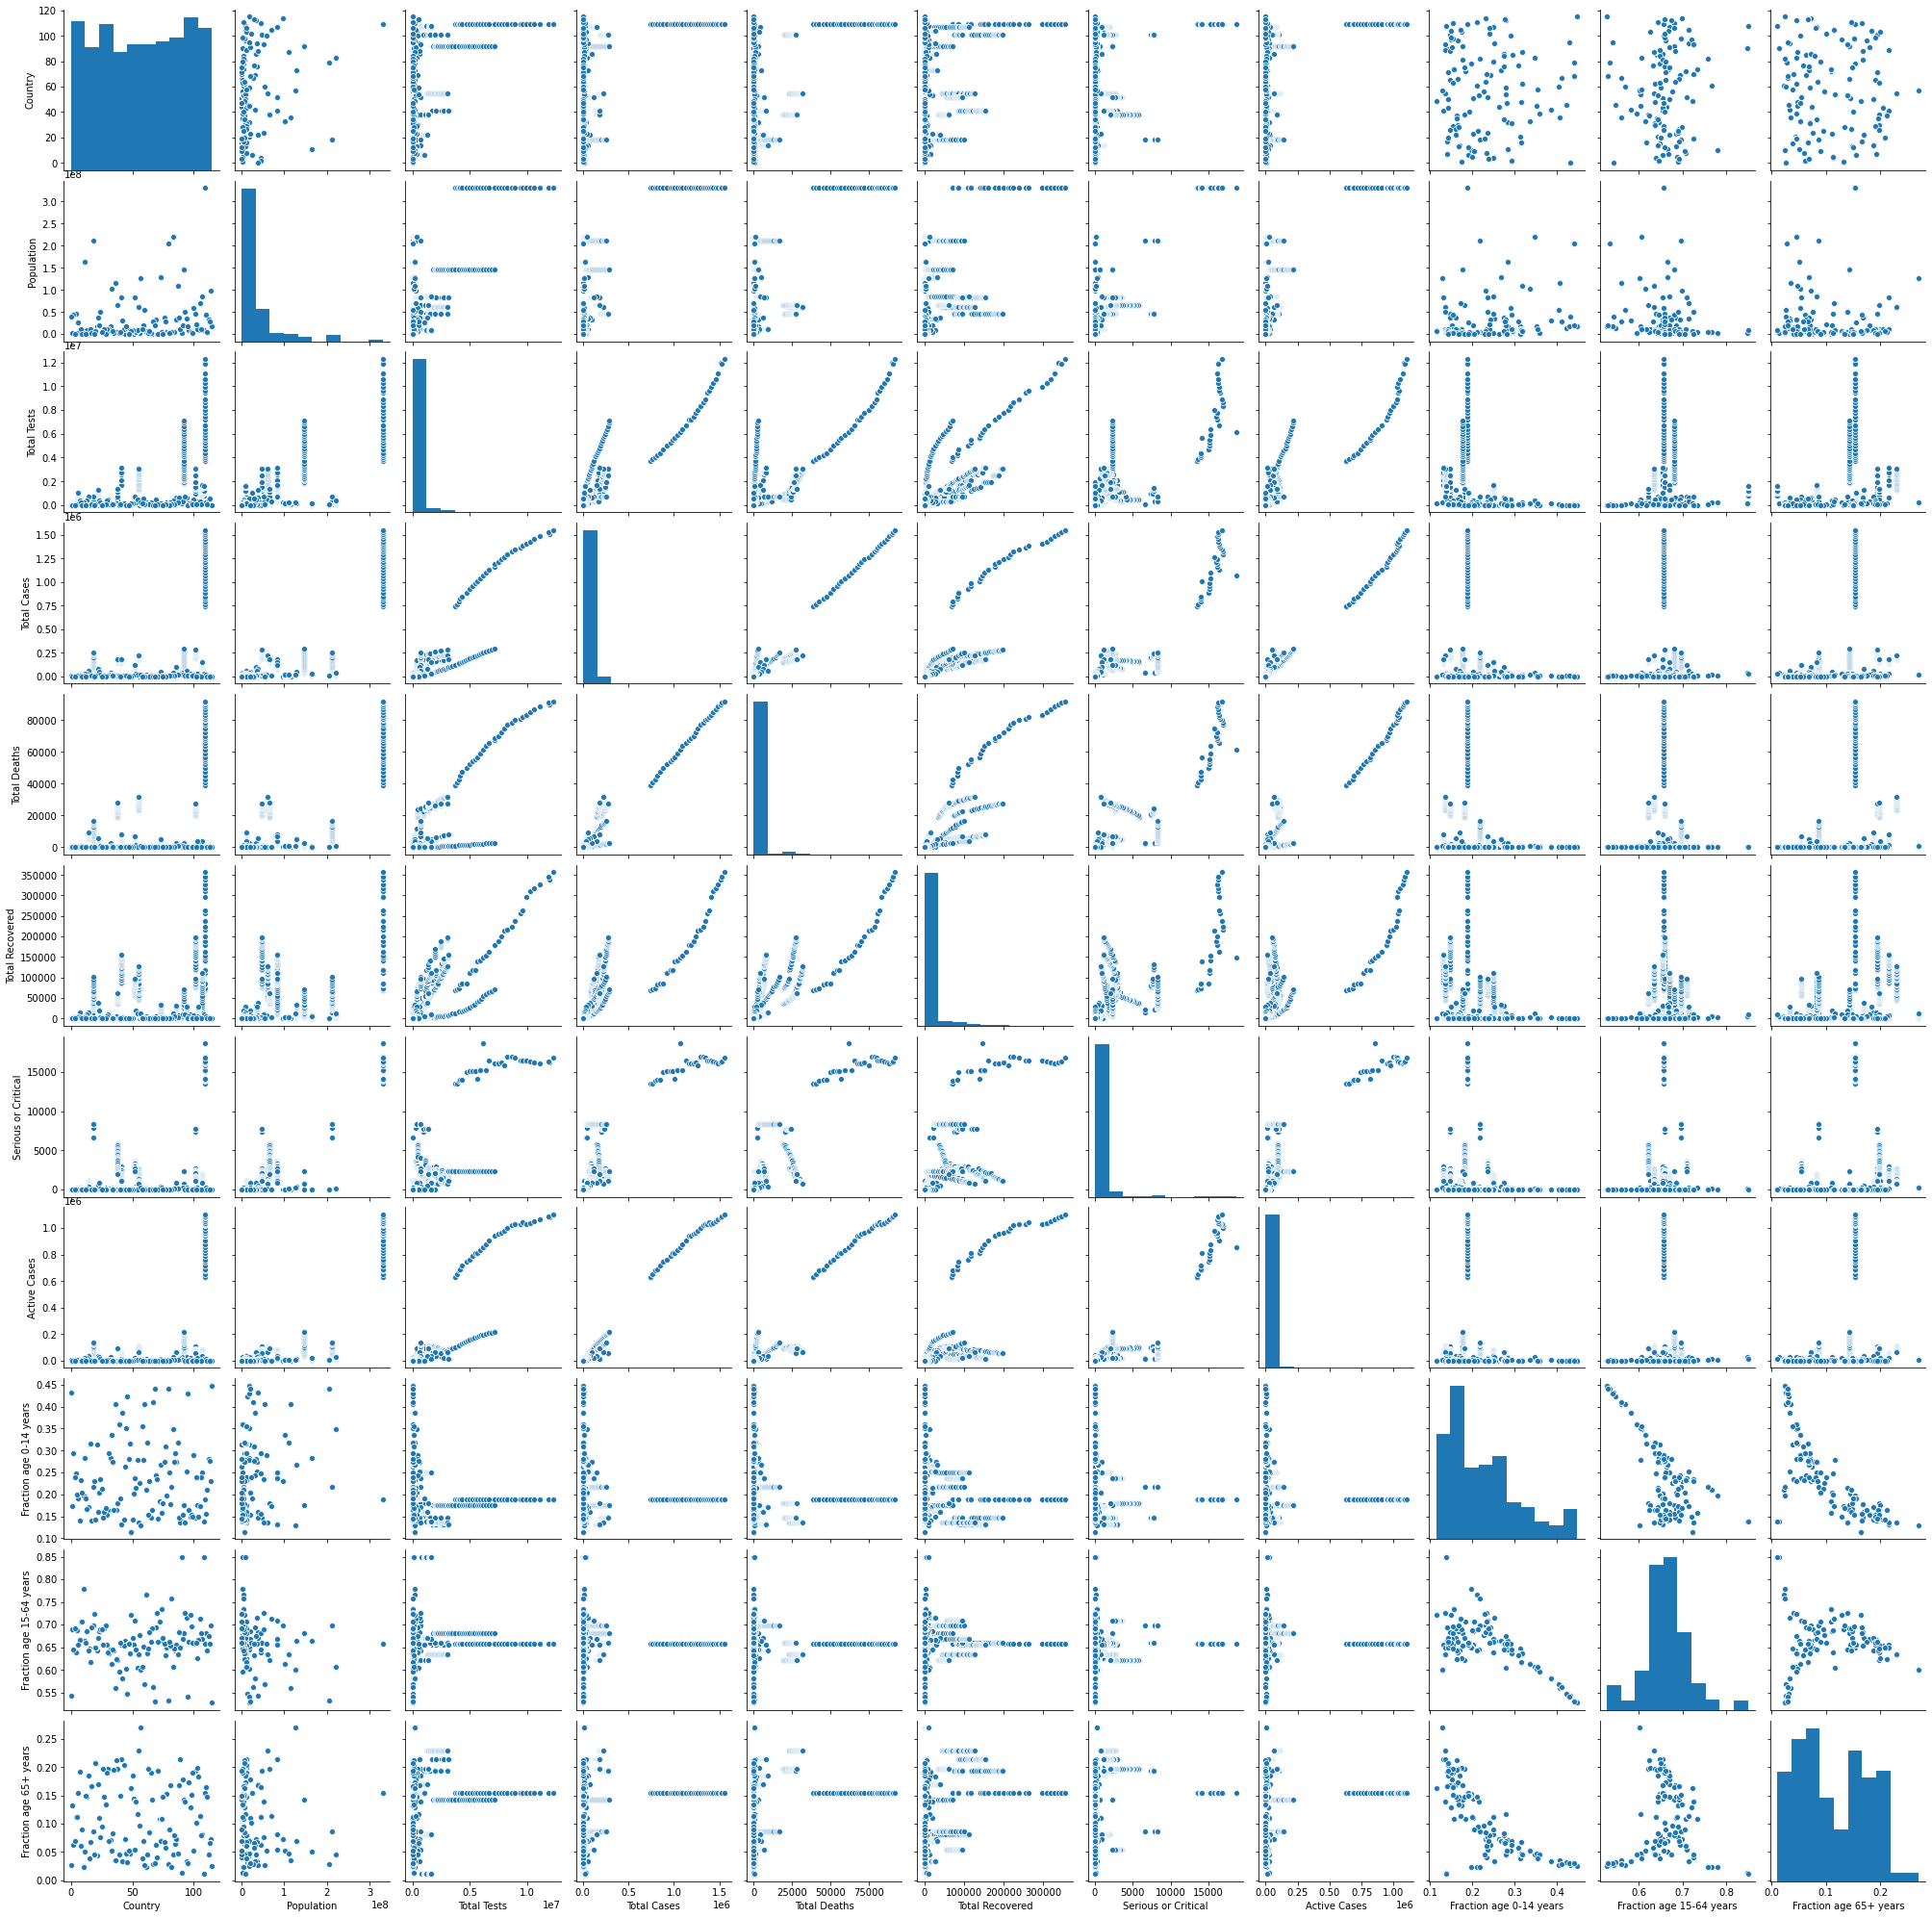

In [23]:
sns.pairplot(data=df)

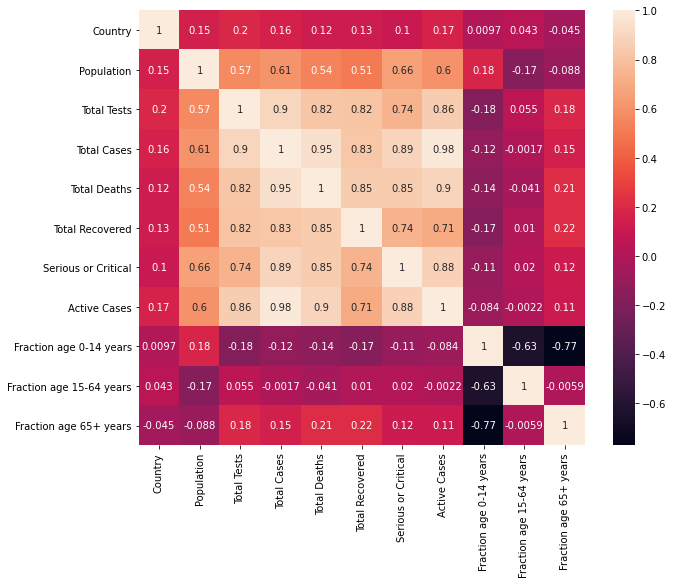

In [24]:
corr_=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=corr_,annot=True)

In [25]:
df.skew()

Country                    -0.025836
Population                  2.993683
Total Tests                 6.899586
Total Cases                 8.789401
Total Deaths                6.947427
Total Recovered             5.326932
Serious or Critical         6.479425
Active Cases                9.589984
Fraction age 0-14 years     0.980357
Fraction age 15-64 years    0.335948
Fraction age 65+ years      0.213082
dtype: float64

In [26]:
#remove skewed data where skewness is > 0.55
for col in df.columns:
    if(df[col].skew()>0.55):
        df[col]=np.log1p(df[col])

Country                         AxesSubplot(0.125,0.71587;0.227941x0.16413)
Population                   AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Total Tests                  AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Total Cases                    AxesSubplot(0.125,0.518913;0.227941x0.16413)
Total Deaths                AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Total Recovered             AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Serious or Critical            AxesSubplot(0.125,0.321957;0.227941x0.16413)
Active Cases                AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Fraction age 0-14 years     AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Fraction age 15-64 years          AxesSubplot(0.125,0.125;0.227941x0.16413)
Fraction age 65+ years         AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

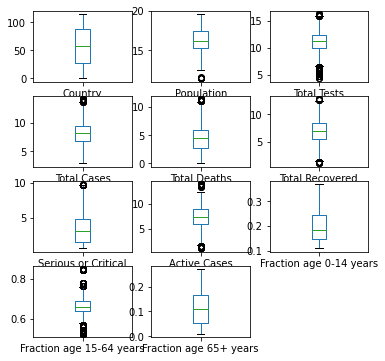

In [ ]:
df.plot.box(layout=(4,3),figsize=(6,6),subplots=True)

In [276]:
#outlier present in dataset
#remove outlier
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
df.shape


(2909, 11)

Country                         AxesSubplot(0.125,0.71587;0.227941x0.16413)
Population                   AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Total Tests                  AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Total Cases                    AxesSubplot(0.125,0.518913;0.227941x0.16413)
Total Deaths                AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Total Recovered             AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Serious or Critical            AxesSubplot(0.125,0.321957;0.227941x0.16413)
Active Cases                AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Fraction age 0-14 years     AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Fraction age 15-64 years          AxesSubplot(0.125,0.125;0.227941x0.16413)
Fraction age 65+ years         AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

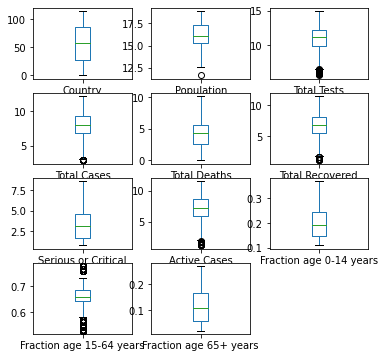

In [277]:
df.plot.box(layout=(4,3),figsize=(6,6),subplots=True)

In [278]:
x=df.drop('Total Deaths',axis=1)
y=df['Total Deaths']
print(x.shape,y.shape)

(2909, 10) (2909,)


In [279]:
standardScaler=StandardScaler()
x=standardScaler.fit_transform(x)
x

array([[-1.34485679,  1.94892596,  0.19552654, ...,  0.74580948,
         0.13038979, -1.01932428],
       [-1.34485679,  1.94892596, -0.17985567, ...,  0.74580948,
         0.13038979, -1.01932428],
       [-1.34485679,  1.94892596, -0.46480438, ...,  0.74580948,
         0.13038979, -1.01932428],
       ...,
       [-1.31510178, -2.39491538, -1.9466766 , ..., -0.43791048,
         0.01933284,  0.58982897],
       [-1.31510178, -2.39491538, -1.9466766 , ..., -0.43791048,
         0.01933284,  0.58982897],
       [-0.36294154, -3.03659462, -2.19996519, ...,  0.48619023,
         0.1081784 , -0.66173467]])

In [280]:
lr_reg=LinearRegression()
lasso=Lasso()
ridge=Ridge()
svr=SVR()
dtree_reg=DecisionTreeRegressor()
kn_reg=KNeighborsRegressor()
sgd_reg=SGDRegressor()
gradient_reg=GradientBoostingRegressor()
ada_reg=AdaBoostRegressor()
rand_reg=RandomForestRegressor()

In [281]:
models=[]
models.append(('LinearRegression',lr_reg))
models.append(('SVR',svr))
models.append(('DecisionTreeRegressor',dtree_reg))
models.append(('KNeighborsRegressor',kn_reg))
models.append(('SGDRegressor',sgd_reg))
models.append(('Gradient Boost Regressor',gradient_reg))
models.append(('Ada Boost Regressor',ada_reg ))
models.append(('RandomForestRegressor',rand_reg))

In [282]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [283]:
#finding and storing matrix model wise
cross_val_list=[]
mse_list=[]
model_name_list=[]
mae_list=[]
r2_score_list=[]
score_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=10,scoring='r2').mean())
    r2_score_list.append(r2_score(y_test,y_pred))
    mse_list.append(mean_squared_error(y_test,y_pred))
    mae_list.append(mean_absolute_error(y_test,y_pred))
    score_list.append(reg_obj.score(x_train,y_train))
    model_name_list.append(reg_name)
    

In [284]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'r2_score':r2_score_list,'mse':mse_list,'mae':mae_list,'train_score':score_list})
df_matrix

,Estimator_Name,cross_val_Score,r2_score,mse,mae,train_score
0,LinearRegression,0.713476,0.892726,0.461252,0.541032,0.884963
1,SVR,0.587063,0.983652,0.070293,0.171518,0.983677
2,DecisionTreeRegressor,0.264180,0.992615,0.031752,0.049586,1.000000
3,KNeighborsRegressor,0.416945,0.997441,0.011005,0.046429,0.997709
4,SGDRegressor,0.684893,0.889552,0.474900,0.537439,0.874386
5,Gradient Boost Regressor,0.669005,0.988785,0.048222,0.168238,0.988568
6,Ada Boost Regressor,0.580093,0.913898,0.370219,0.521928,0.904771
7,RandomForestRegressor,0.490379,0.998484,0.006520,0.040610,0.999472


In [285]:
#Random Forest Regressor performing good ..
joblib.dump(rand_reg,'World_Covid19_Case_Study.pkl')

['World_Covid19_Case_Study.pkl']